In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [175]:
url = 'https://www.wunderground.com/history/airport/KJRB/2016/1/16/MonthlyHistory.html?MR=1'
url2 = 'https://weather.com/weather/hourbyhour/l/90210:4:US'

In [176]:
temp_raw = pd.read_html(url2)

In [168]:
temp_df = pd.DataFrame(temp_raw[0])

In [169]:
temp_df.head()

,Time,Description,Temp,Feels,Precip,Humidity,Wind,Unnamed: 7
0,NaN,3:30 pmFri,Cloudy,76°,76°,0%,48%,NW 8 mph
1,NaN,4:00 pmFri,Cloudy,76°,76°,0%,48%,NW 8 mph
2,NaN,5:00 pmFri,Cloudy,76°,76°,0%,48%,NW 7 mph
3,NaN,6:00 pmFri,Cloudy,75°,75°,5%,51%,NW 7 mph
4,NaN,7:00 pm Fri,Partly Cloudy,74°,74°,5%,52%,NNW 6 mph


In [170]:

temp_df = temp_df.iloc[:,1:]
temp_df.columns = ['Time','Description','Temp','Feels','Precip','Humidity','Wind']
temp_df

,Time,Description,Temp,Feels,Precip,Humidity,Wind
0,3:30 pmFri,Cloudy,76°,76°,0%,48%,NW 8 mph
1,4:00 pmFri,Cloudy,76°,76°,0%,48%,NW 8 mph
2,5:00 pmFri,Cloudy,76°,76°,0%,48%,NW 7 mph
3,6:00 pmFri,Cloudy,75°,75°,5%,51%,NW 7 mph
4,7:00 pm Fri,Partly Cloudy,74°,74°,5%,52%,NNW 6 mph
5,8:00 pm Fri,Mostly Cloudy,73°,73°,0%,55%,NNW 7 mph
6,9:00 pm Fri,Partly Cloudy,72°,72°,0%,60%,NNW 6 mph
7,10:00 pm Fri,Partly Cloudy,71°,71°,0%,61%,NNW 5 mph
8,11:00 pm Fri,Partly Cloudy,70°,70°,0%,62%,NNW 6 mph
9,12:00 am Sat,Partly Cloudy,69°,69°,0%,67%,NNW 6 mph


In [171]:
temp_df['Time'] = pd.to_datetime(temp_df['Time'].map(lambda x: x.split('m')[0] + 'm'))
temp_df['Wind_Direction'] = temp_df['Wind'].map(lambda x: x.split()[0])
temp_df['Wind_Speed'] = temp_df['Wind'].map(lambda x: int(x.split()[1]))
temp_df['Temp'] = temp_df['Temp'].map(lambda x: int(x[:-1]))
temp_df['Feels'] = temp_df['Feels'].map(lambda x: int(x[:-1]))
temp_df['Precip'] = temp_df['Precip'].map(lambda x: int(x[:-1]))
temp_df['Humidity'] = temp_df['Humidity'].map(lambda x: int(x[:-1]))

In [172]:
temp_df

,Time,Description,Temp,Feels,Precip,Humidity,Wind,Wind_Direction,Wind_Speed
0,2017-08-25 15:30:00,Cloudy,76,76,0,48,NW 8 mph,NW,8
1,2017-08-25 16:00:00,Cloudy,76,76,0,48,NW 8 mph,NW,8
2,2017-08-25 17:00:00,Cloudy,76,76,0,48,NW 7 mph,NW,7
3,2017-08-25 18:00:00,Cloudy,75,75,5,51,NW 7 mph,NW,7
4,2017-08-25 19:00:00,Partly Cloudy,74,74,5,52,NNW 6 mph,NNW,6
5,2017-08-25 20:00:00,Mostly Cloudy,73,73,0,55,NNW 7 mph,NNW,7
6,2017-08-25 21:00:00,Partly Cloudy,72,72,0,60,NNW 6 mph,NNW,6
7,2017-08-25 22:00:00,Partly Cloudy,71,71,0,61,NNW 5 mph,NNW,5
8,2017-08-25 23:00:00,Partly Cloudy,70,70,0,62,NNW 6 mph,NNW,6
9,2017-08-25 00:00:00,Partly Cloudy,69,69,0,67,NNW 6 mph,NNW,6


(array([ 7.,  0.,  2.,  0.,  0.,  1.,  0.,  3.,  0.,  3.]),
 array([ 3. ,  3.4,  3.8,  4.2,  4.6,  5. ,  5.4,  5.8,  6.2,  6.6,  7. ]),
 <a list of 10 Patch objects>)

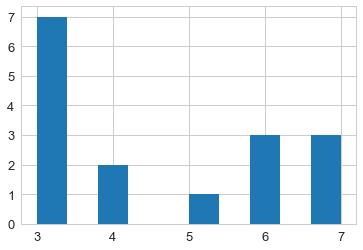

In [173]:
plt.hist(y['Wind_Speed'].map(lambda x: int(x)))

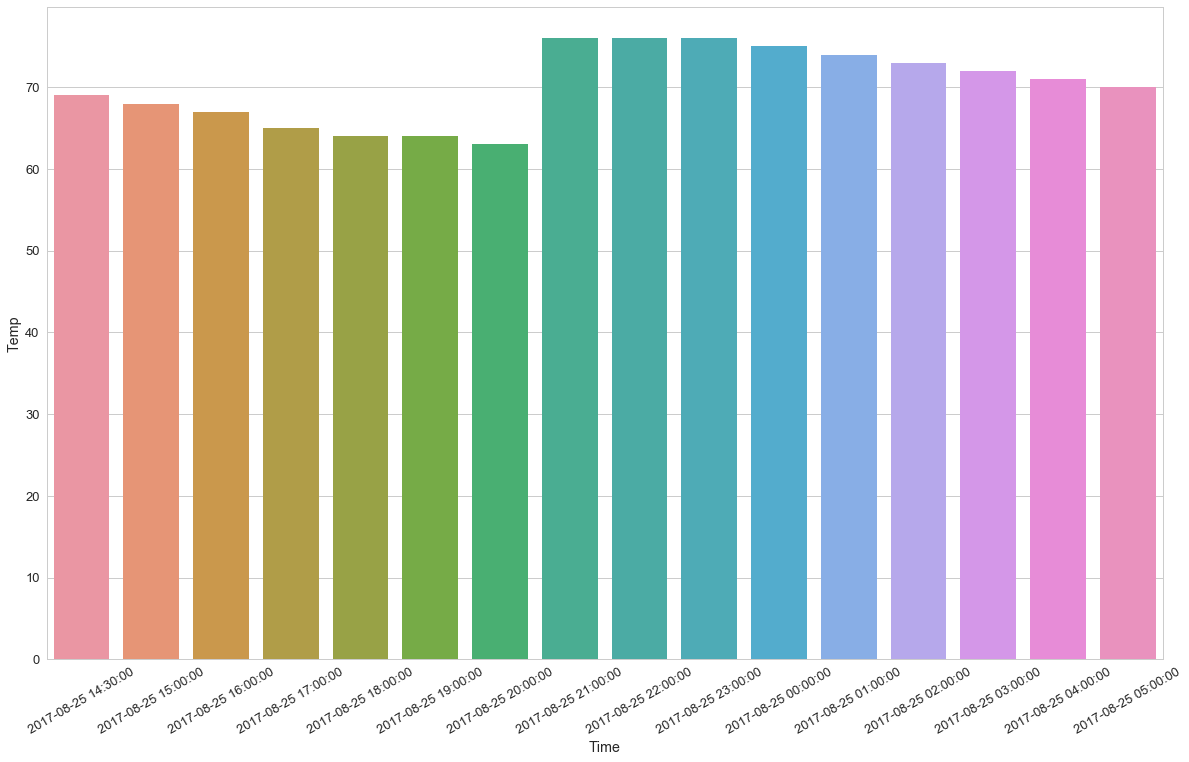

In [174]:
plt.figure(figsize=(20,12))
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.3)
g = sns.barplot(x='Time',y='Temp',data = temp_df)
g.set_xticklabels(rotation=30,labels= x)


/Users/scott/Library/Python/3.6/lib/python/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


UnboundLocalError: local variable 'units' referenced before assignment

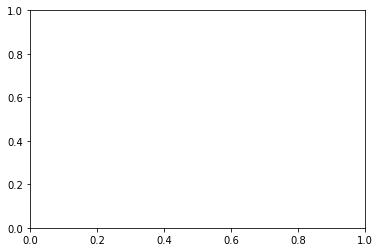

In [139]:
x = temp_df['Time']
data = temp_df['Temp']


In [7]:
p = requests.get(url)
soup = BeautifulSoup(p.content, 'lxml')


In [ ]:
mt = soup.findA